In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn import preprocessing
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### 1) Importing the File

In [2]:
df= pd.read_csv('bank-full.csv')

In [3]:
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [4]:
df= pd.read_csv('bank-full.csv',delimiter=';')

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 2) Checking Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3) Performing Descriptive Analysis

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 4) Checking for Null and Duplicate Values

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.duplicated().sum()

0

### 5) Checking the Correlation

In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


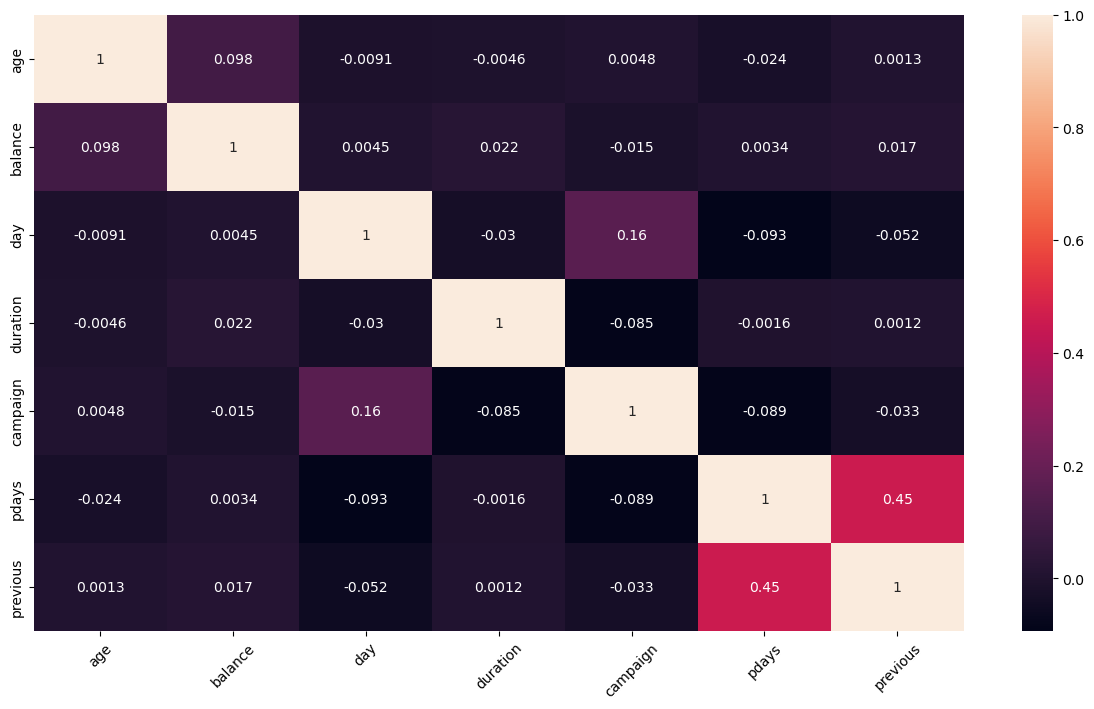

In [11]:
fig= plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45);

### 6) Lets see if Contact and Poutcome predict the outcome variable

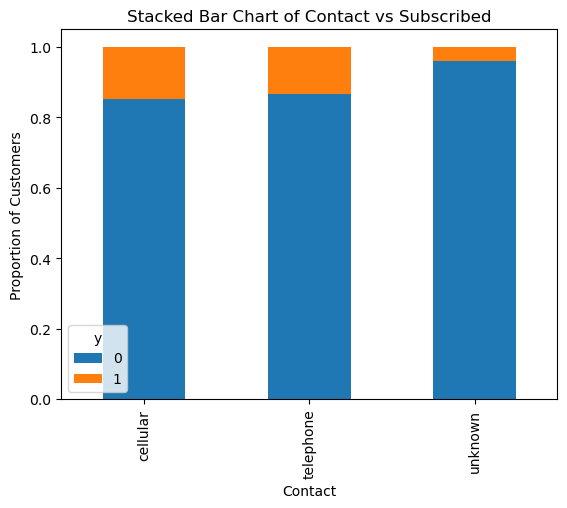

In [17]:
table=pd.crosstab(df.contact,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers');

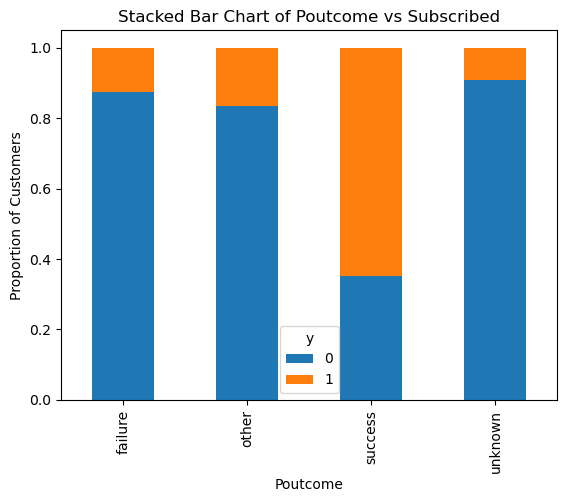

In [18]:
table=pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Subscribed')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers');

##### Note:- As we can see contact and poutcome are not strong predictors of the outcome variable, so we will drop them and perform logistic regression

### 7) Performing Logistic Regression

In [15]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df ['housing'] = df ['housing'].map({'yes': 1, 'no': 0})
df ['loan'] = df ['loan'].map({'yes': 1, 'no': 0})
df ['y'] = df ['y'].map({'yes': 1, 'no': 0})

In [19]:
df = pd.get_dummies(df, columns=['job'])
df = pd.get_dummies(df, columns=['marital'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['month'])
df = df.drop(['contact', 'poutcome'], axis=1)

In [20]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

In [21]:
logreg = LogisticRegression()

In [26]:
rfe = RFE(logreg)

In [27]:
rfe = rfe.fit(X, y.values.ravel())

In [28]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False False False False False False False
 False  True False  True False False  True False False False False  True
 False  True False False  True  True  True  True False  True  True  True
  True  True  True  True  True]
[18  1 22  1  1 20 19  9 21 10 17  7  4  1 14  1 13 12  1 15  5  3  8  1
 16  1  2 11  1  1  1  1  6  1  1  1  1  1  1  1  1]


##### Note:- As per RFE we can exclude all the variables which are False

In [30]:
X = df[['default', 'housing', 'loan', 'job_housemaid', 'job_retired', 'job_student', 'marital_married', 'education_primary', 'education_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = df.loc[:, df.columns == 'y']

In [33]:
logit=sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.329035
         Iterations 7


In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45191
Method:                           MLE   Df Model:                           19
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                 0.08823
Time:                        14:41:21   Log-Likelihood:                -14876.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3787      0.147     -2.583      0.010      -0.666      -0.091
housing              -0.8781      0.032    -27.113      0.000      -0.942      -0.815
loan                 -0.5724      0.052    -11.078      0.000      -0.674      -0.471
job_housemaid        -0.3289      0.107     -3.063      0.002      -0.539      -0.118
job_retired           0.4625      0.060      7.766      0.000       0.346       0.579
job_student           0.3142      0.083      3.793      0.000       0.152       0.477
marital_married      -0.4290      0.030    -14.327      0.000      -0.488      -0.370
education_primary    -0.4093      0.050     -8.128      0.000      -0.508      -0.311
education_unknown    -0.1917      0.076     -2.526      0.012      -0.340      -0.043
month_aug            -1.6473      0.044    -37.054      0.000      -1.734      -1.560
month_dec             0.2455      0.143      1.721      0.085      -0.034       0.525
month_feb            -1.0118      0.056    -18.069      0.000      -1.122      -0.902
month_jan            -1.6548      0.091    -18.198      0.000      -1.833      -1.477
month_jul            -1.4992      0.048    -31.550      0.000      -1.592      -1.406
month_jun            -1.4979      0.050    -30.193      0.000      -1.595      -1.401
month_mar             0.5074      0.097      5.253      0.000       0.318       0.697
month_may            -1.5674      0.044    -35.900      0.000      -1.653      -1.482
month_nov            -1.4004      0.057    -24.622      0.000      -1.512      -1.289
month_oct             0.1817      0.079      2.290      0.022       0.026       0.337
month_sep             0.2701      0.088      3.053      0.002       0.097       0.443
=====================================================================================
"""

In [35]:
logreg.fit(X, y)

LogisticRegression()

### 8) Lets see Accuracy, Classification Report and Confusion Matrix

In [36]:
y_pred = logreg.predict(X)

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.88


In [41]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     39922
           1       0.49      0.09      0.15      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.54      0.54     45211
weighted avg       0.84      0.88      0.84     45211



### 9) ROC Curve

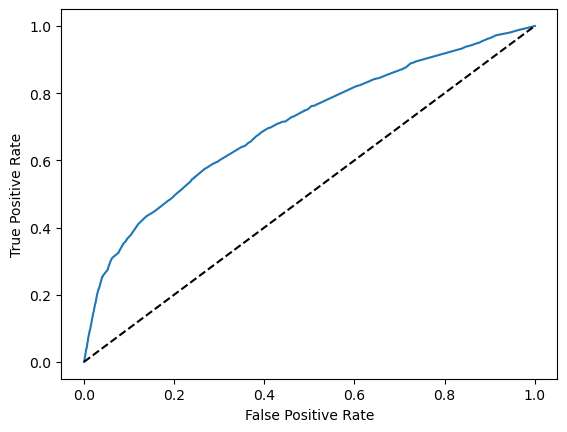

auc: 0.537259


In [48]:
pre=logreg.predict(X)
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
auc=roc_auc_score(y,pre)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)')
plt.plot([0, 1], [0, 1],'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
print('auc:',np.round(auc,6))
